In [1]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from load_dataset import *
import os
print(os.getcwd()) 

/home/jovyan/work/nbs


In [2]:
type0_df, type1_df, type2_df, type3_df, type4_df, type5_df, type6_df=load_data()

20000   20000   20000   2747   9493   17367   20510


In [3]:
feature_cols=get_features_title()

In [6]:
divided_forest_list=load_data_ten_fold_cross_validation(feature_cols, type0_df, type1_df, type2_df, type3_df, type4_df, type5_df, type6_df)


total dataset number:  110117
10


In [7]:
divided_forest_list[9].show(5, False)

+------------------------------------------------------------------------------------------------------+-----+
|features                                                                                              |label|
+------------------------------------------------------------------------------------------------------+-----+
|(54,[0,1,2,3,4,5,6,7,8,9,10,42],[2640.0,135.0,17.0,42.0,10.0,1295.0,244.0,230.0,109.0,6383.0,1.0,1.0])|1    |
|(54,[0,1,2,3,4,5,6,7,8,9,12,24],[2960.0,193.0,3.0,674.0,128.0,577.0,219.0,242.0,159.0,1429.0,1.0,1.0])|4    |
|(54,[0,1,2,3,4,5,6,7,8,9,10,42],[2837.0,90.0,15.0,67.0,10.0,5370.0,242.0,215.0,99.0,4491.0,1.0,1.0])  |1    |
|(54,[0,1,2,3,4,5,6,7,8,9,12,23],[2534.0,329.0,10.0,67.0,-2.0,1449.0,197.0,229.0,171.0,1445.0,1.0,1.0])|5    |
|(54,[0,1,2,3,4,5,6,7,8,9,10,42],[2603.0,99.0,14.0,525.0,77.0,1060.0,242.0,221.0,106.0,3823.0,1.0,1.0])|1    |
+------------------------------------------------------------------------------------------------------+-----+
o

In [19]:
training_data_final=[]
validation_data_final=[]
# create cross validation datasets
for i in range(0,10):
    validation_data_final.append(divided_forest_list[i])
    new_df=get_empty_df(divided_forest_list[i].schema)
    for j in range(0,10):
        if j!=i:
            new_df=new_df.union(divided_forest_list[j])
    training_data_final.append(new_df)

for i in training_data_final:
    #print(i.count())
    i.show(3,False)

+------------------------------------------------------------------------------------------------------+-----+
|features                                                                                              |label|
+------------------------------------------------------------------------------------------------------+-----+
|(54,[0,1,2,3,4,5,6,7,8,9,12,51],[3386.0,53.0,10.0,182.0,37.0,2848.0,226.0,219.0,127.0,1533.0,1.0,1.0])|6    |
|(54,[0,1,2,3,4,5,6,7,8,9,13,23],[2028.0,27.0,24.0,30.0,3.0,331.0,202.0,180.0,104.0,745.0,1.0,1.0])    |2    |
|(54,[0,1,2,3,4,5,6,7,8,9,12,52],[3263.0,159.0,39.0,182.0,106.0,1358.0,228.0,215.0,80.0,778.0,1.0,1.0])|6    |
+------------------------------------------------------------------------------------------------------+-----+
only showing top 3 rows

+-------------------------------------------------------------------------------------------------------+-----+
|features                                                                             

In [23]:
# Train a DecisionTree model.
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy_list=[]
#7 mins for one loop
for i in range(0,10):
    model = dt.fit(training_data_final[i])
    # Make predictions.
    predictions = model.transform(validation_data_final[i])
    accuracy = evaluator.evaluate(predictions)
    accuracy_list.append(accuracy)
    print(accuracy)
print("finished predict")


0.7773363431151241
0.7699720796181212
0.7810995002271695
0.7765342960288809
0.7781529476181785
0.768595041322314
0.7659574468085106
0.7701885771000632
0.7697512801755669
0.7756847756847757
finished predict


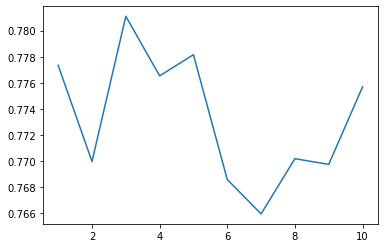

In [25]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], accuracy_list)

In [26]:
sum=0
for i in accuracy_list:
    sum=sum+i
print("average accuracy: ",sum/10)

average accuracy:  0.7733272287698705
